# New MMD-method: Calculate MMD for feature-shift per class

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from MultiClassCSBM import MultiClassCSBM
from CSBMFeat import CSBMFeat
from metrics import mmd_rbf

In [2]:
dimensions = 10
classes = 10
n = 500
gamma = 2 * dimensions

In [3]:
def mmd_per_class(csbm):
    result = 0
    X = csbm.X[:n]
    y_1 = csbm.y[:n]
    Z = csbm.X[-n:]
    y_2 = csbm.y[-n:]
    for c in range(classes):
        result += mmd_rbf(X[y_1==c], Z[y_2==c], gamma)
    return result / classes

In [4]:
def get_average_mean_distance(csbm):
    result = 0
    for c in range(classes):
        result += np.linalg.norm(csbm.means[c] - csbm.initial_means[c])
    return result / classes

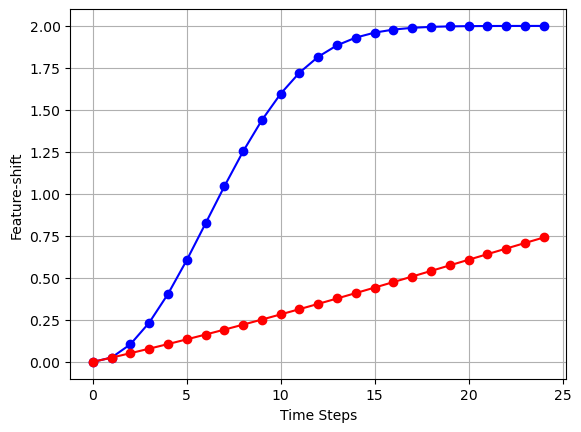

In [5]:
csbm = CSBMFeat(n=n, classes=classes, dimensions=dimensions, sigma_square=1e-30)
feature_shift = []
mean_distances = []
time_steps = []
for t in range(25):
    time_steps.append(t)
    feature_shift.append(mmd_per_class(csbm))
    mean_distances.append(get_average_mean_distance(csbm))
    csbm.evolve()
plt.plot(time_steps, feature_shift, marker='o', linestyle='-', color='b')
plt.plot(time_steps, mean_distances, marker='o', linestyle='-', color='r')
plt.xlabel('Time Steps')
plt.ylabel('Feature-shift')
plt.grid(True)
plt.show()

## Calculate feature shift with an example 'by hand'

In [38]:
start_mean = np.array([1, 1, 0, 0])
start_mean = start_mean / np.linalg.norm(start_mean)
target_mean = np.array([0, 0, 1, 1])
target_mean = target_mean / np.linalg.norm(target_mean)
covariance_matrix = 0.01 * np.eye(4)

In [39]:
initial_features = np.random.multivariate_normal(start_mean, covariance_matrix, 250)
time_steps = []
mmds = []
mean_distances = []
curr_mean = start_mean

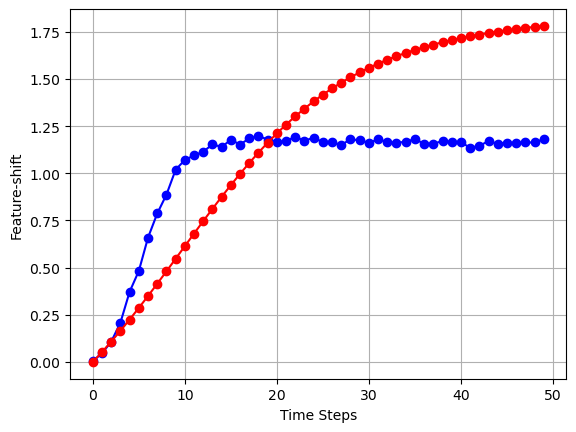

In [40]:
for t in range(50):
    time_steps.append(t)
    features = np.random.multivariate_normal(curr_mean, covariance_matrix, 250)
    mmds.append(mmd_rbf(initial_features, features, 2 * 4))
    mean_distances.append(np.linalg.norm(curr_mean - start_mean))
    curr_mean = curr_mean + 0.05 * (target_mean - start_mean)
    curr_mean = curr_mean / np.linalg.norm(curr_mean)
plt.plot(time_steps, mmds, marker='o', linestyle='-', color='b')
plt.plot(time_steps, mean_distances, marker='o', linestyle='-', color='r')
plt.xlabel('Time Steps')
plt.ylabel('Feature-shift')
plt.grid(True)
plt.show()